### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# List all physical devices recognized by TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPUs:", physical_devices)
if gpus :
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 20)])

    except RuntimeError as e:
        print(e)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


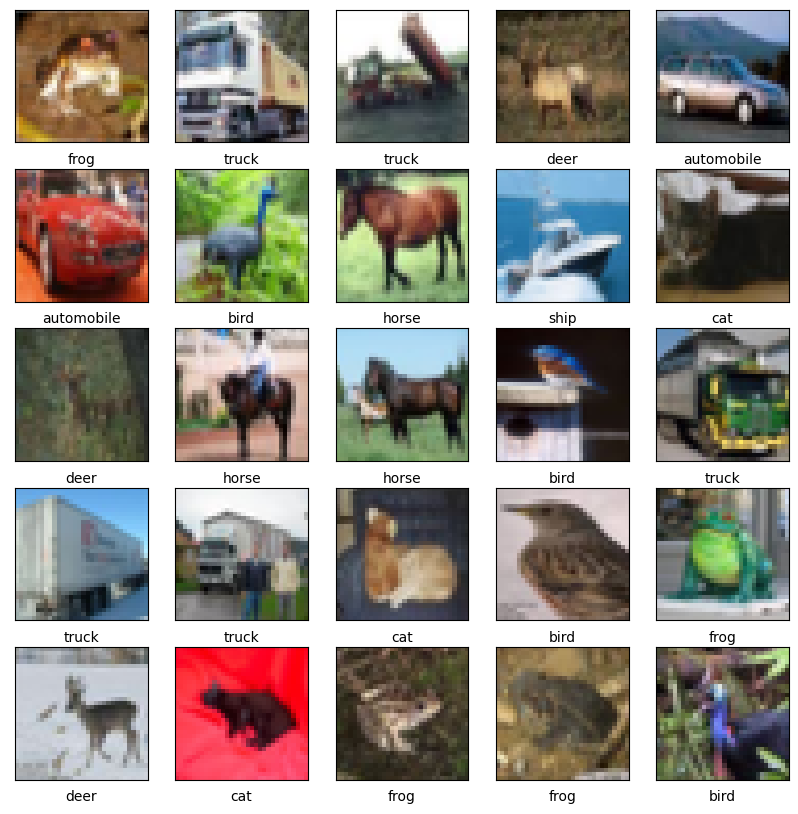

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
train_images.shape

(50000, 32, 32, 3)

### Create the model (your code goes here)

In [10]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

#setup model
model = tf.keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.6),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    
    layers.Dense(10),
])

### Compile and train the model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels), batch_size=512)

Epoch 1/90
98/98 [==============================] - 8s 49ms/step - loss: 0.0938 - accuracy: 0.9746 - val_loss: 1.5071 - val_accuracy: 0.7143
Epoch 2/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0800 - accuracy: 0.9778 - val_loss: 1.1356 - val_accuracy: 0.7833
Epoch 3/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0662 - accuracy: 0.9814 - val_loss: 1.1625 - val_accuracy: 0.7849
Epoch 4/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0678 - accuracy: 0.9810 - val_loss: 1.3898 - val_accuracy: 0.7533
Epoch 5/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0654 - accuracy: 0.9817 - val_loss: 1.0749 - val_accuracy: 0.7883
Epoch 6/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0536 - accuracy: 0.9851 - val_loss: 1.2631 - val_accuracy: 0.7666
Epoch 7/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0534 - accuracy: 0.9853 - val_loss: 1.2572 - val_accuracy: 0.7775
Epoch 8/90
98

Epoch 59/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0319 - accuracy: 0.9917 - val_loss: 1.5014 - val_accuracy: 0.7711
Epoch 60/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0286 - accuracy: 0.9925 - val_loss: 1.5051 - val_accuracy: 0.7854
Epoch 61/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 1.5604 - val_accuracy: 0.7686
Epoch 62/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 1.5161 - val_accuracy: 0.7690
Epoch 63/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 1.6166 - val_accuracy: 0.7324
Epoch 64/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 1.3289 - val_accuracy: 0.7984
Epoch 65/90
98/98 [==============================] - 3s 31ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 1.5805 - val_accuracy: 0.7840
Epoch 

### Evaluate the model

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 1.4642 - accuracy: 0.8003 - 2s/epoch - 8ms/step


In [15]:
print(test_acc)

0.8003000020980835


In [16]:
# Had to eek out that last percent. Got stuck at 76% when the goal was 80%. I just hit it with compute and surprisingly it didn't overfit!